In [2]:
import csv
import numpy as np
from mpmath import *
import matplotlib.pyplot as plt

In [3]:
mp.dps = 30
nmax = 10
en_const = en_cons = 1
data = {}
M = [2,0]
Delta = [0,-2]

In [4]:
reader = csv.reader(open('DF_OI_Q_0_cutoff_30.csv','r'))
O = {}
for k,v in reader:
    O[k] = v

In [5]:
def OverlapA(n1,m1,lambda1,n2,m2,lambda2):
    if m1 != m2:
        return 0
    key = str(lambda1)+","+str(n1)+","+str(lambda2)+","+str(n2)+","+str(m1)
    oi = float(O[key])
    if abs(oi) < 1e-15:
        oi = 0
    return oi
def OverlapB(n1,m1,lambda1,n2,m2,lambda2):
    if n1 == n2 and lambda1 == lambda2:
        return 1 - OverlapA(n1,m1,lambda1,n2,m2,lambda2)
    else:
        return - OverlapA(n1,m1,lambda1,n2,m2,lambda2)

In [6]:
def E0(m,n,lambdaa,gamma):
    return gamma * (en_cons * lambdaa * n)

In [7]:
def Delta_H_ij(n1,m1,lambda1,gamma1,n2,m2,lambda2,gamma2):
    h_ij = 0
    if gamma1 == 1 and gamma2 == 1:
        oiA = OverlapA(n1,m1,lambda1,n2,m2,-lambda2)
        oiB = OverlapB(n1,m1,lambda1,n2,m2,-lambda2)
        h_ij += M[0] * oiA + M[1] * oiB
    if gamma1 == 1 and gamma2 == -1:
        oiA = OverlapA(n1,m1,lambda1,n2,m2,lambda2)
        oiB = OverlapB(n1,m1,lambda1,n2,m2,lambda2)
        h_ij += lambda2 * (-1)**(1/2 - m2) * (Delta[0]*oiA + Delta[1]*oiB)
    if gamma1 == -1 and gamma2 == 1:
        oiA = OverlapA(n1,m1,lambda1,n2,m2,lambda2)
        oiB = OverlapB(n1,m1,lambda1,n2,m2,lambda2)
        h_ij += lambda1 * (-1)**(1/2 - m1) * (np.conjugate(Delta[0])*oiA + np.conjugate(Delta[1])*oiB)
    if gamma1 == -1 and gamma2 == -1:
        oiA = OverlapA(n1,-m1,lambda1,n2,-m2,-lambda2)
        oiB = OverlapB(n1,-m1,lambda1,n2,-m2,-lambda2)
        h_ij += - lambda1 * lambda2 * (M[0]*oiA + M[1]*oiB)
    return h_ij

In [8]:
def Hamiltonian(m):
    nmin = int(abs(m)+0.5)
    Nmax = nmax+1
    H1 = np.zeros((4*(Nmax-nmin),4*(Nmax-nmin))) + 1j * np.zeros((4*(Nmax-nmin),4*(Nmax-nmin)))
    H2 = np.zeros((4*(Nmax-nmin),4*(Nmax-nmin))) + 1j * np.zeros((4*(Nmax-nmin),4*(Nmax-nmin)))
    H3 = np.zeros((4*(Nmax-nmin),4*(Nmax-nmin))) + 1j * np.zeros((4*(Nmax-nmin),4*(Nmax-nmin)))
    H4 = np.zeros((4*(Nmax-nmin),4*(Nmax-nmin))) + 1j * np.zeros((4*(Nmax-nmin),4*(Nmax-nmin)))
    N = len(H1)
    for i in range(N): # gamma loop
        for j in range(N): # lambda loop
            n1 = int(i/4) + nmin
            n2 = int(j/4) + nmin
            lambdaa1 = (-1)**(int(i)%2)
            lambdaa2 = (-1)**(int(j)%2)
            gamma1 = (-1)**(int(i/2)%2)
            gamma2 = (-1)**(int(j/2)%2)
            if i == j:
                H1[i,j] += E0(m,n1,lambdaa1,gamma1)
            H1[i,j] += Delta_H_ij(n1,m,lambdaa1,gamma1,n2,m,lambdaa2,gamma2)
            if i == j:
                H4[i,j] += E0(-m,n2,lambdaa2,gamma2)
            H4[i,j] += Delta_H_ij(n1,-m,lambdaa1,gamma1,n2,-m,lambdaa2,gamma2)
            H2[i,j] += Delta_H_ij(n1,-m,lambdaa1,gamma1,n2,m,lambdaa2,gamma2)
    H = np.block([[H1,H2],[H2.T,-H4.T]])
    return H1

4
8
12
16
20
24
28
32
36
40
40
36
32
28
24
20
16
12
8
4


Text(0.5, 1.0, 'MA=2,MB=0,DeltaA=0,DeltaB=-2')

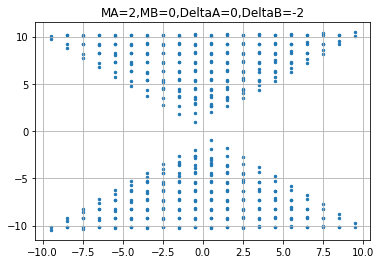

In [9]:
lmax = -0.5 + nmax
mm = [-lmax+i for i in range(int(2*lmax+1))]

E = []
MM = []
for m in mm:
    H = Hamiltonian(m)
    eigvals, eigvecs = np.linalg.eigh(H)
    N = len(eigvals)
    print(N)
    for i in range(N):
        E.append(eigvals[i])
        MM.append(m)

np.savetxt("MA_"+str(M[0])+",MB_"+str(M[1])+",DeltaA_"+str(Delta[0])+",DeltaB_"+str(Delta[1])+".dat",np.c_[MM,E])
plt.figure(1)
plt.grid()
plt.scatter(MM,E,s=6)
plt.title("MA="+str(M[0])+",MB="+str(M[1])+",DeltaA="+str(Delta[0])+",DeltaB="+str(Delta[1]))
# plt.ylim(-20,20)
# plt.savefig("MA_"+str(M[0])+"_MB_"+str(M[1])+"_DeltaA_"+str(Delta[0])+"_DeltaB_"+str(Delta[1])+".pdf")

In [9]:
mm

[-9.5,
 -8.5,
 -7.5,
 -6.5,
 -5.5,
 -4.5,
 -3.5,
 -2.5,
 -1.5,
 -0.5,
 0.5,
 1.5,
 2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5]

In [272]:
MM

[-8.5,
 -8.5,
 -8.5,
 -8.5,
 -7.5,
 -7.5,
 -7.5,
 -7.5,
 -7.5,
 -7.5,
 -7.5,
 -7.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -6.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -5.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -4.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -3.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -2.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,
 -1.5,